# Mixscape Norman

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
from pathlib import Path
import sys
sys.path.insert(1, str(Path().cwd().parent))
import common_config

In [3]:
common_config.figure_jupyter()

In [4]:
import pertpy as pt
import scanpy as sc

ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

In [5]:
adata = sc.read_h5ad("data/norman_preprocessed.h5ad")

## Apply mixscape

In [6]:
ms_pt = pt.tl.Mixscape()

In [7]:
ms_pt.perturbation_signature(adata, pert_key='perturbation_name', control='control')

In [8]:
adata_pert = adata.copy()

In [9]:
adata_pert

AnnData object with n_obs × n_vars = 111255 × 4000
    obs: 'guide_identity', 'read_count', 'UMI_count', 'coverage', 'gemgroup', 'good_coverage', 'number_of_cells', 'guide_AHR', 'guide_ARID1A', 'guide_ARRDC3', 'guide_ATL1', 'guide_BAK1', 'guide_BCL2L11', 'guide_BCORL1', 'guide_BPGM', 'guide_C19orf26', 'guide_C3orf72', 'guide_CBFA2T3', 'guide_CBL', 'guide_CDKN1A', 'guide_CDKN1B', 'guide_CDKN1C', 'guide_CEBPA', 'guide_CEBPB', 'guide_CEBPE', 'guide_CELF2', 'guide_CITED1', 'guide_CKS1B', 'guide_CLDN6', 'guide_CNN1', 'guide_CNNM4', 'guide_COL1A1', 'guide_COL2A1', 'guide_CSRNP1', 'guide_DLX2', 'guide_DUSP9', 'guide_EGR1', 'guide_ELMSAN1', 'guide_ETS2', 'guide_FEV', 'guide_FOSB', 'guide_FOXA1', 'guide_FOXA3', 'guide_FOXF1', 'guide_FOXL2', 'guide_FOXO4', 'guide_GLB1L2', 'guide_HES7', 'guide_HK2', 'guide_HNF4A', 'guide_HOXA13', 'guide_HOXB9', 'guide_HOXC13', 'guide_IER5L', 'guide_IGDCC3', 'guide_IKZF3', 'guide_IRF1', 'guide_ISL2', 'guide_JUN', 'guide_KIAA1804', 'guide_KIF18B', 'guide_KIF2C', 'g

In [10]:
adata_pert.X = adata_pert.layers['X_pert']

In [11]:
sc.pp.pca(adata_pert)

In [12]:
sc.pp.neighbors(adata_pert, metric='cosine')

In [13]:
sc.tl.umap(adata_pert)

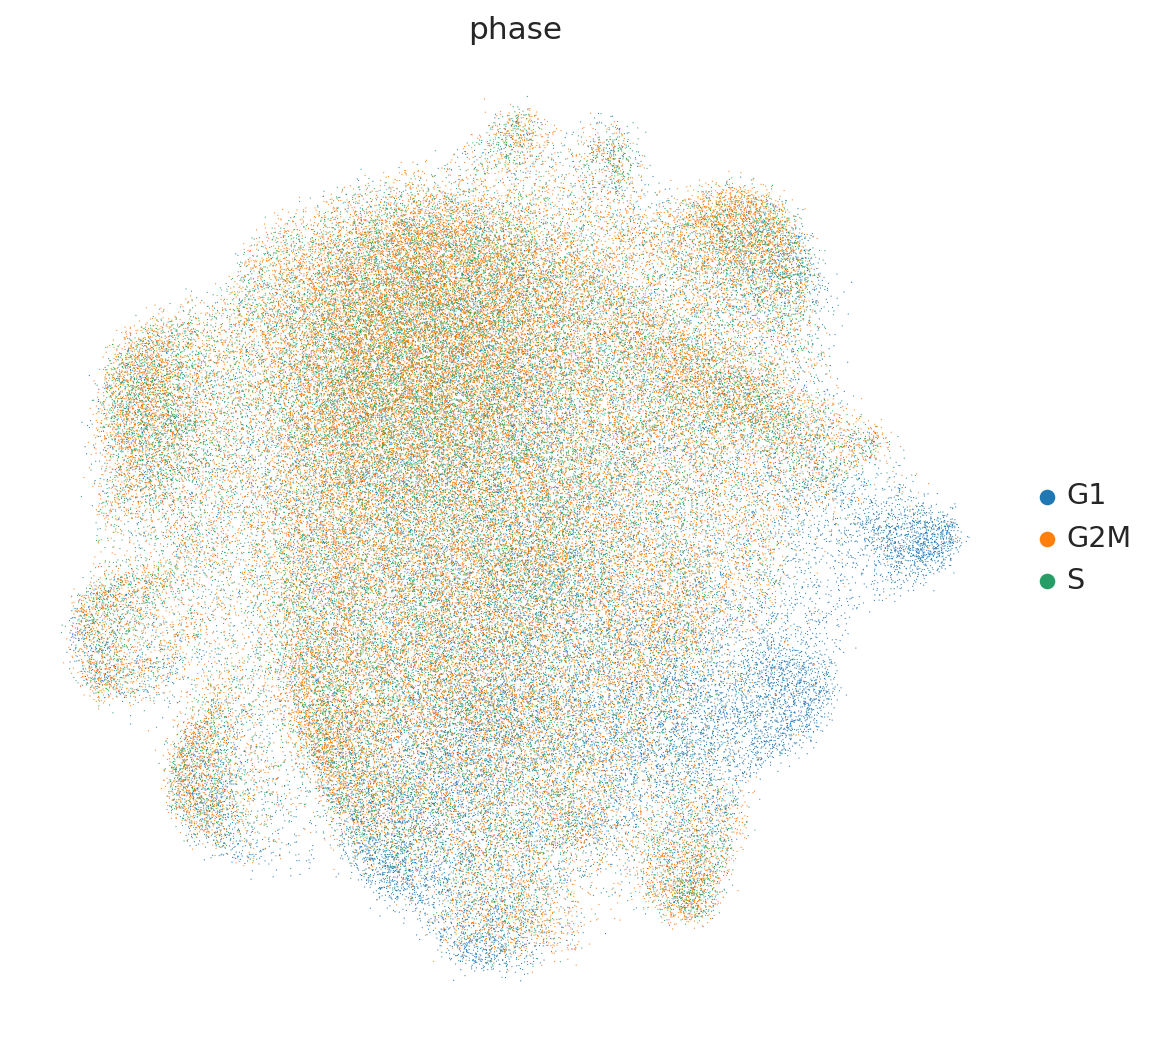

In [14]:
sc.pl.umap(adata_pert, color='phase')

In [15]:
adata.obs["guide_ids"] = adata.obs["guide_ids"].cat.rename_categories({ "": "control" })

In [16]:
ms_pt.mixscape(adata = adata, control = 'control', labels='guide_ids', layer='X_pert')

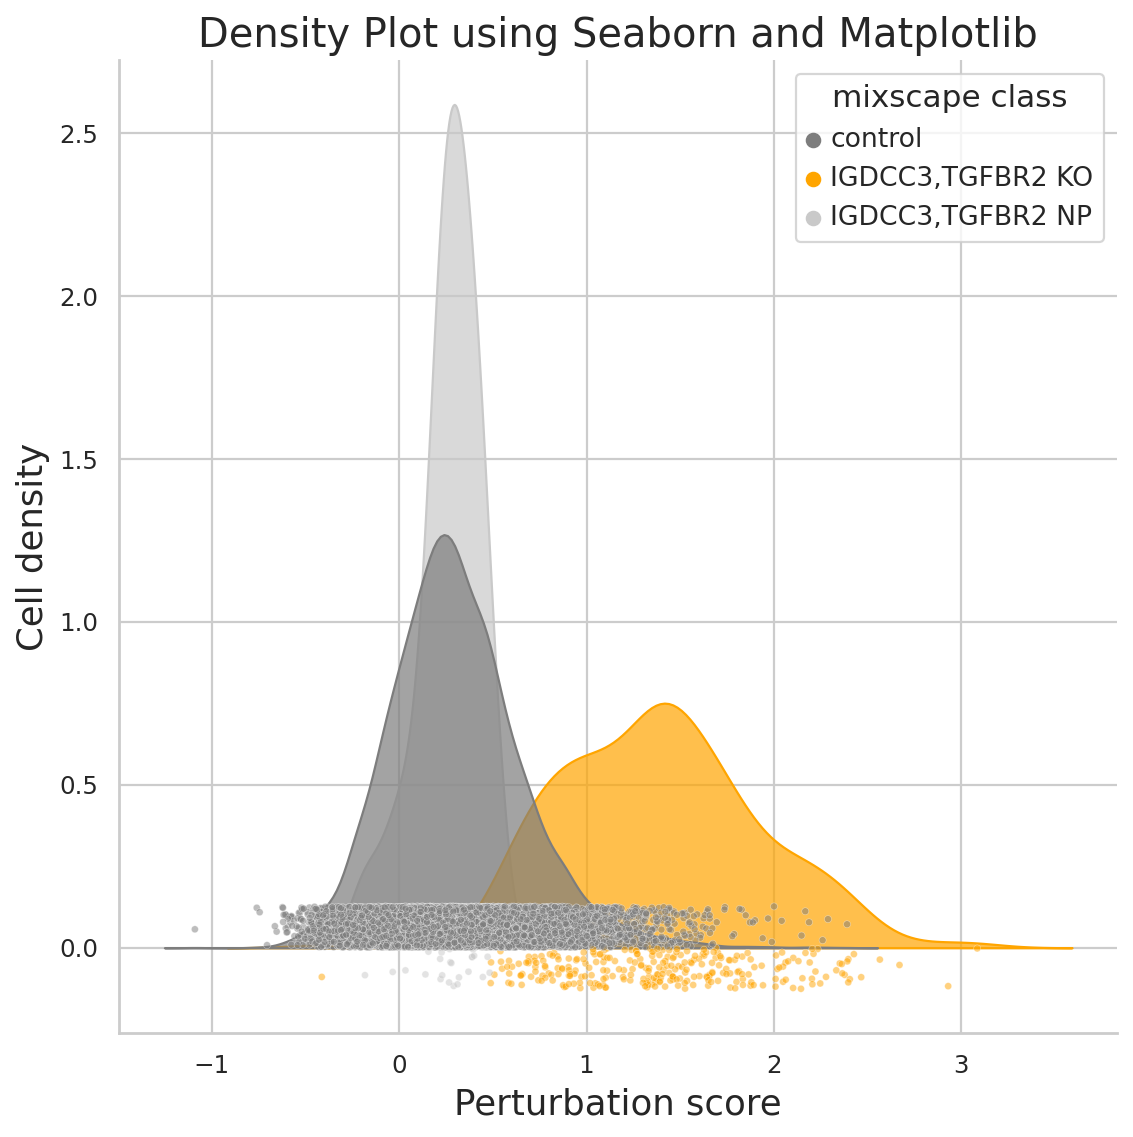

In [17]:
ms_pt.plot_perturbscore(adata = adata, labels='guide_ids', target_gene='IGDCC3,TGFBR2', color = 'orange')

In [18]:
adata.obs[["guide_identity", "guide_ids", 'mixscape_class_p_ko','mixscape_class','mixscape_class_global']]

,guide_identity,guide_ids,mixscape_class_p_ko,mixscape_class,mixscape_class_global
index,,,,,
AAACCTGAGAAGAAGC-1,NegCtrl0_NegCtrl0__NegCtrl0_NegCtrl0,control,0.000000,control,control
AAACCTGAGGCATGTG-1,TSC22D1_NegCtrl0__TSC22D1_NegCtrl0,TSC22D1,0.834231,TSC22D1 KO,KO
AAACCTGAGGCCCTTG-1,KLF1_MAP2K6__KLF1_MAP2K6,"KLF1,MAP2K6",0.958181,"KLF1,MAP2K6 KO",KO
AAACCTGCACGAAGCA-1,NegCtrl10_NegCtrl0__NegCtrl10_NegCtrl0,control,0.000000,control,control
AAACCTGCAGACGTAG-1,CEBPE_RUNX1T1__CEBPE_RUNX1T1,"CEBPE,RUNX1T1",0.998354,"CEBPE,RUNX1T1 KO",KO
...,...,...,...,...,...
TTTGTCATCAGTACGT-8,FOXA3_NegCtrl0__FOXA3_NegCtrl0,FOXA3,0.999965,FOXA3 KO,KO
TTTGTCATCCACTCCA-8,CELF2_NegCtrl0__CELF2_NegCtrl0,CELF2,0.827964,CELF2 KO,KO
TTTGTCATCCCAACGG-8,BCORL1_NegCtrl0__BCORL1_NegCtrl0,BCORL1,0.976214,BCORL1 KO,KO


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the foll

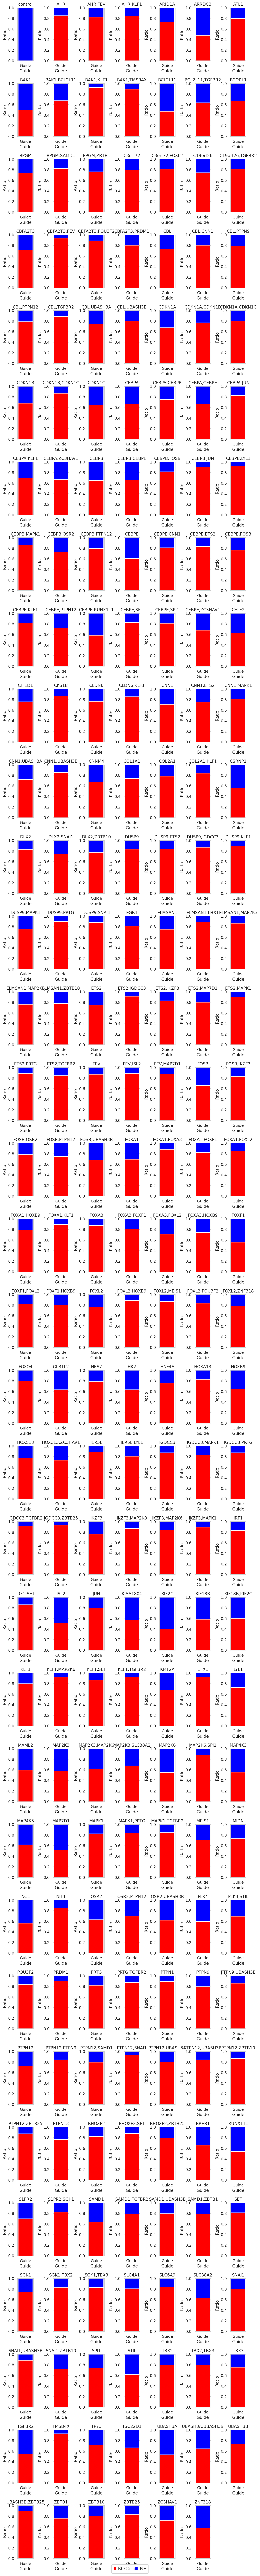

In [51]:
import matplotlib.pyplot as plt
import numpy as np

guide_means = adata.obs.groupby('guide_ids')['mixscape_class_p_ko'].mean()

guide_means_np = 1 - guide_means
plots_per_row = 7
num_plots = len(guide_means)
num_rows = np.ceil(num_plots / plots_per_row)
fig, axes = plt.subplots(nrows=int(num_rows), ncols=plots_per_row, figsize=(10, 4 * num_rows))
axes = axes.flatten()

for i, (guide_id, ko_ratio) in enumerate(guide_means.items()):
    np_ratio = guide_means_np[guide_id]
    axes[i].bar('Guide', ko_ratio, color=common_config.pt_red, label='KO')
    axes[i].bar('Guide', np_ratio, bottom=ko_ratio, color=common_config.pt_blue, label='NP')
    axes[i].set_title(guide_id)
    axes[i].set_ylim(0, 1)
    axes[i].set_xlabel('Guide')
    axes[i].set_ylabel('Ratio')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

handles, labels = axes[0].get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='lower center', ncol=2, fontsize='large')

plt.subplots_adjust(bottom=0.15)

plt.tight_layout()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the foll

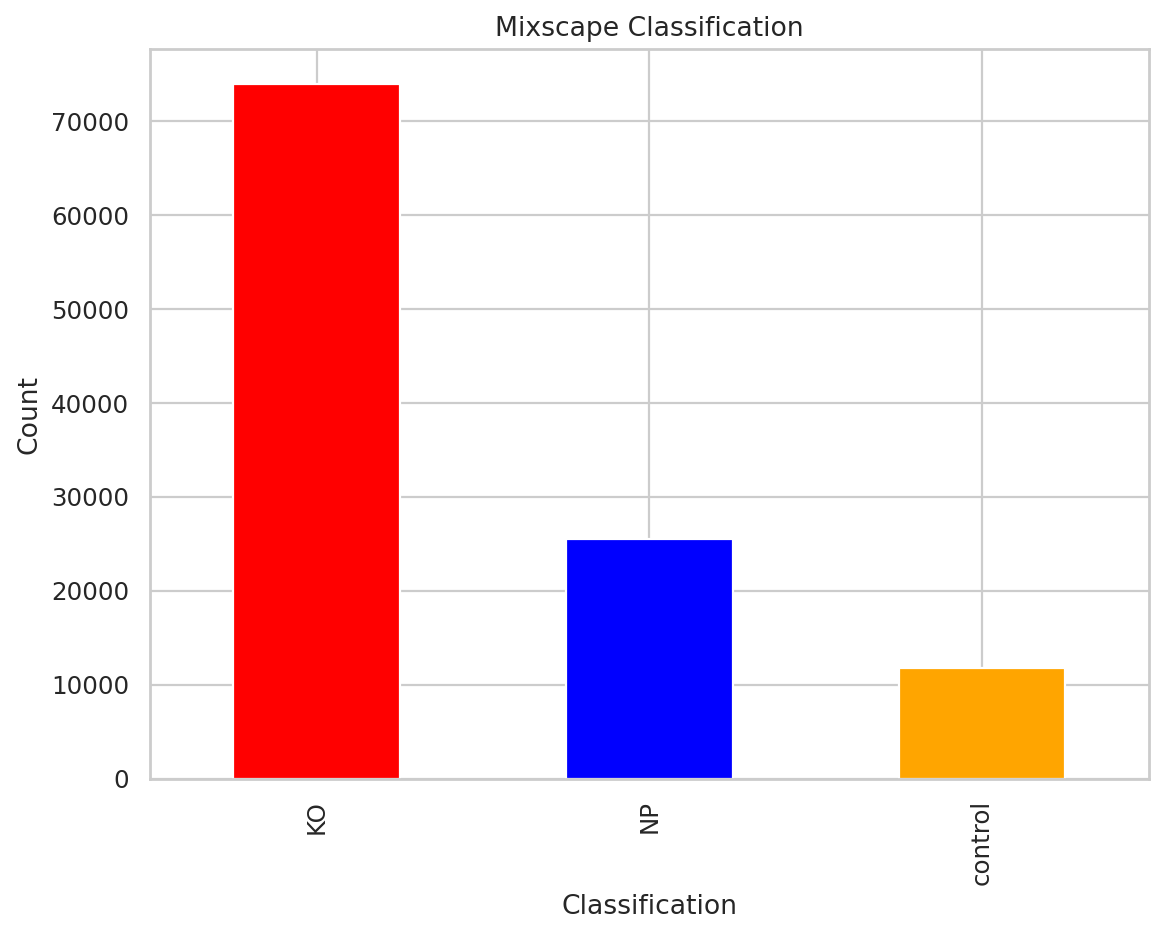

In [61]:
classification_counts = adata.obs["mixscape_class_global"].value_counts()


colors = {
    'control': common_config.pt_orange,
    'KO': common_config.pt_red,
    'NP': common_config.pt_blue
}
plt.figure(figsize=(8, 6))
classification_counts.plot(kind='bar', color=[colors[class_] for class_ in classification_counts.index])
plt.title('Mixscape Classification')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.show()


In [62]:
adata.write("data/norman_mixscaped.h5ad")